# 결정 트리


## LogisticRegression
- 타겟값이 단순할 경우, logisticregression을 사용
- binary에 대한 분류문제를 풀 예정

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine['class'].unique()

array([0., 1.])

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(data, target, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_X)

train_scaled_X = ss.transform(train_X)
test_scaled_X = ss.transform(test_X)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled_X, train_Y)

print(f"LogisticRegression socre")
print(f"train score : {lr.score(train_scaled_X, train_Y)}")
print(f"test score : {lr.score(test_scaled_X, test_Y)}")


LogisticRegression socre
train score : 0.7859195402298851
test score : 0.7655384615384615


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled_X, train_Y)

print(f"DecisionTreeClassifier socre")
print(f"train score : {dt.score(train_scaled_X, train_Y)}")
print(f"test score : {dt.score(test_scaled_X, test_Y)}")

# test score가 더 낮기 때문에 과대적합된 모델

DecisionTreeClassifier socre
train score : 0.9973316912972086
test score : 0.8516923076923076


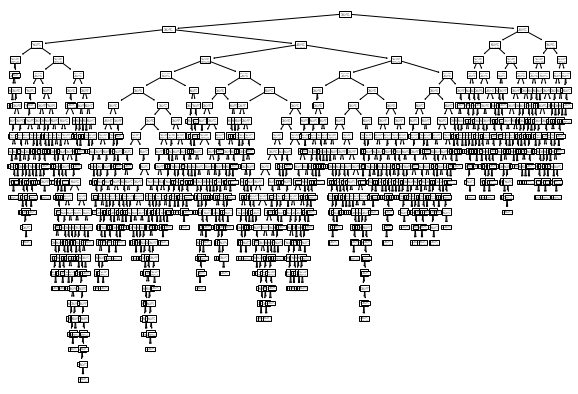

In [14]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

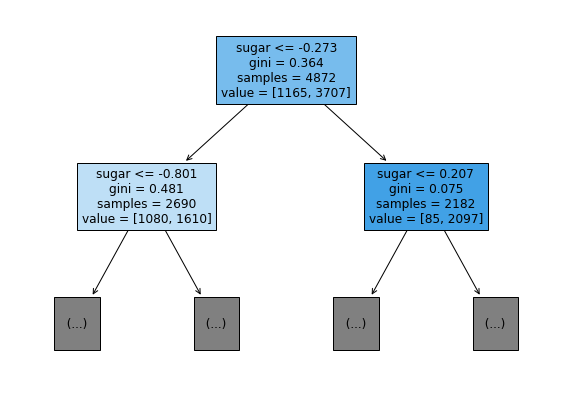

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
dt.classes_

array([0., 1.])

### 불순도
- gini : 지니 불순도(gini impurity)
- DecisionTreeClassifier클래스의 criterion 매개변수의 기본값이 'gini'
  - criterion 매개변수는 데이터를 분할할 기준을 정하는 것
  - gini = 1 - (음성 클래스의 비율^2 + 양성 클래스 비율^2)
  - dicisiontree 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장 시킴
  - 부모와 자식 노드 사이의 불순도 차이를 정보 이득 information gain
- criterion='entropy' 불순도도 존재
  - 노드 클래스의 비율을 사용하지만, 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱함

### 가지치기


In [18]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled_X, train_Y)


print(f"DecisionTreeClassifier socre")
print(f"train score : {dt.score(train_scaled_X, train_Y)}")
print(f"test score : {dt.score(test_scaled_X, test_Y)}")

DecisionTreeClassifier socre
train score : 0.8499589490968801
test score : 0.8363076923076923


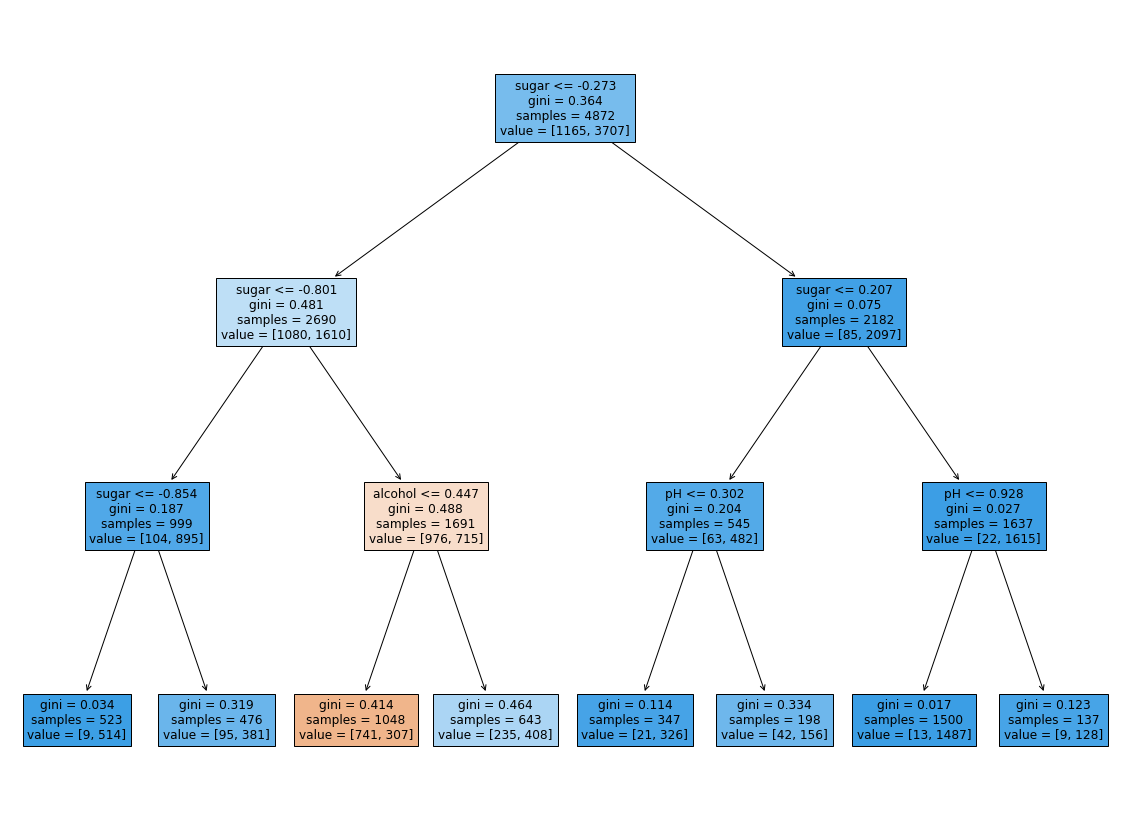

In [19]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 결정트리 모델에서는 정규화 하지 않기
- 위의 그래프에서 기준값들이 음수가 있음
- 트리 모델에서는 피처의 스케일이 결정 트리 알고리즘에 아무런 영향을 미치지 않음

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_X, train_Y)


print(f"DecisionTreeClassifier socre")
print(f"train score : {dt.score(train_X, train_Y)}")
print(f"test score : {dt.score(test_X, test_Y)}")

DecisionTreeClassifier socre
train score : 0.8499589490968801
test score : 0.8363076923076923


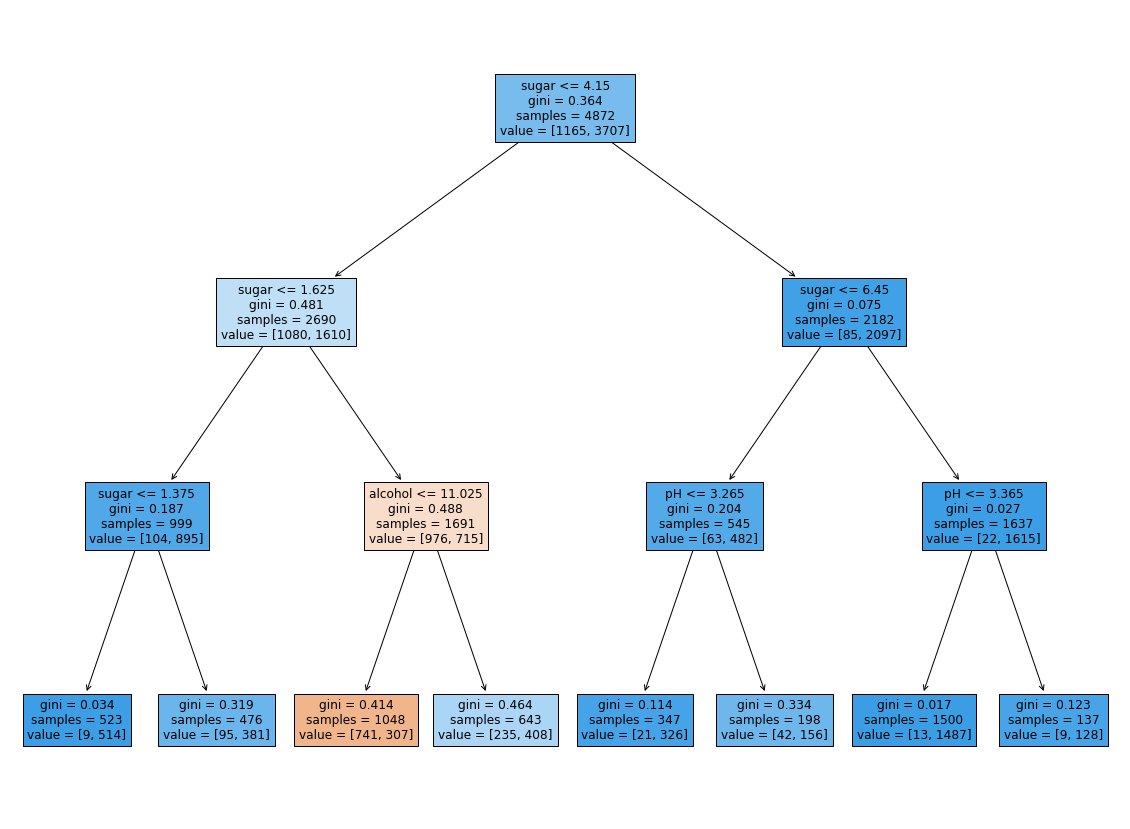

In [22]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
# 피처의 중요도 확인
print(dt.feature_importances_)

[0.12871631 0.86213285 0.00915084]
